In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

data_set = pd.read_csv("4410_15-PreClassActivityData.csv",
                 delimiter = ",", 
                 skipinitialspace=True, 
#                 index_col="Substituent", 
                 comment = "#") 

print(data_set)

   Substituent Substituent2  sigma  k(OH)X1000
0       m-OCH3        3-MeO   0.11      3.9200
1    p-N(CH3)2       4-NMe2  -0.83      0.0634
2         p-Cl         4-Cl   0.23     11.7000
3         m-Cl         3-Cl   0.37     18.2000
4         p-Br         4-Br   0.23     13.9000
5         m-Br         3-Br   0.39     17.9000
6          p-I          4-I   0.18     12.2000
7          m-I          3-I   0.35     15.0000
8          p-F          4-F   0.06      5.8600
9         p-CN         4-CN   0.66    157.0000
10        m-CN         3-CN   0.56    103.0000
11       m-NO2        3-NO2   0.72    137.0000
12       p-NO2        4-NO2   0.78    246.0000
13       p-NH2        4-NH2  -0.66      0.0864
14       m-NH2        3-NH2  -0.16      1.6600
15           H            H   0.00      2.8900
16       m-CH3         3-Me  -0.07      1.6900
17       p-CH3         4-Me  -0.17      1.1400
18        o-CN         2-CN   1.06    122.0000
19      o-OCH3        2-MeO   0.12      1.1600
20       o-CH

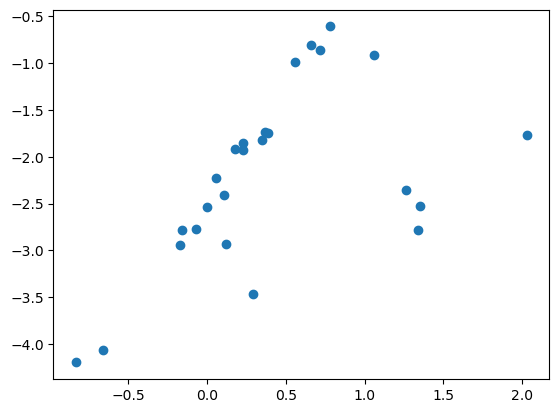

In [2]:
x = data_set["sigma"]
y = np.log10(data_set["k(OH)X1000"] * 1e-3)
plt.scatter(x,y)
plt.show()

slope = 2.3041 +/- 0.0743
intercept = -2.4749 +/- 0.0334
rsq = 0.9836


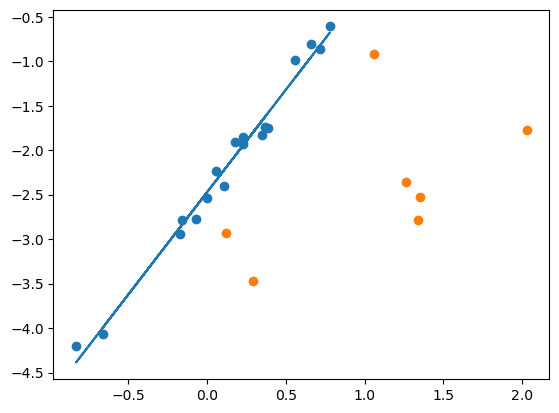

In [3]:
# slice for the first 18 rows of data (rows 0 to 17)
x = data_set[0:18]["sigma"]                       # sigma for m,p   
y = np.log10(data_set[0:18]["k(OH)X1000"]*1e-3)   # log(rate)

fit = stats.linregress(x,y)           # linear regression function

# Print results
print(f"slope = {fit.slope:0.4f} +/- {fit.stderr:0.4f}")
print(f"intercept = {fit.intercept:0.4f} +/- {fit.intercept_stderr:0.4f}")
print(f"rsq = {fit.rvalue**2:0.4f}")

y_fit = fit.slope * x + fit.intercept  # Calculate line according to line fit
plt.plot(x, y_fit)                     # Plot calculated line
plt.scatter(x, y)                      # Scatter plot of data

# slice for row 18 to 24 of data - ortho substituents
x = data_set[18:25]["sigma"]                       # sigma for ortho
y = np.log10(data_set[18:25]["k(OH)X1000"]*1e-3)   # log(rate)
plt.scatter(x ,y)                      # Scatter plot of data
plt.show()                             # Show plot and clear it

In [ ]:
# A more sophisticated way to separate the two parts of the data set
# the o-substituents will not always be conveniently at the end of the data set
# This selects rows that contain substituent names that begin with "o" - or NOT

df = data_set.copy()  # Always copy. A simple assignment might mean that things  
                      #  that change df will also change data_set.  

# Each series in a pandas array is a data object that includes many 'methods'
# The .str method converts each entry into a text string
# the .startswith method returns "True" or "False"
filtered_df = df[df["Substituent"].str.startswith("o")] 
print(filtered_df)
print()

# the "~" is a NOT and will flip the bits in the mask
filtered_df = df[~df["Substituent"].str.startswith("o")] 
print(filtered_df)

# I asked MS Copilot to show me how to select row based on the first letter in 
#  a series and it gave me the method that I needed. I am warming up to AI.
#  I will become friends with it and then it will betray me. But, until then...

   Substituent Substituent2  sigma  k(OH)X1000
18        o-CN         2-CN   1.06     122.000
19       o-OEt        2-EtO  -0.01       1.160
20       o-CH3         2-Me   0.29       0.338
21        o-Cl         2-Cl   1.26       4.400
22       o-NO2        2-NO2   2.03      16.900
23        o-Br         2-Br   1.35       3.000
24         o-I          2-I   1.34       1.630

   Substituent Substituent2  sigma  k(OH)X1000
0       m-OCH3        3-MeO   0.12      3.9200
1    p-N(CH3)2       4-NMe2  -0.83      0.0634
2         p-Cl         4-Cl   0.23     11.7000
3         m-Cl         3-Cl   0.37     18.2000
4         p-Br         4-Br   0.23     13.9000
5         m-Br         3-Br   0.39     17.9000
6          p-I          4-I   0.18     12.2000
7          m-I          3-I   0.35     15.0000
8          p-F          4-F   0.06      5.8600
9         p-CN         4-CN   0.66    157.0000
10        m-CN         3-CN   0.56    103.0000
11       m-NO2        3-NO2   0.72    137.0000
12       p-N

In [64]:
df["Substituent"].str.startswith("o")   # This is the mask that was applied

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18     True
19     True
20     True
21     True
22     True
23     True
24     True
Name: Substituent, dtype: bool